In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [12]:
raw_df = pd.read_csv('~/Downloads/bitcoin_train.csv').drop('Unnamed: 0',axis=1)
df_test = pd.read_csv('~/Downloads/bitcoin_test.csv').drop('Unnamed: 0',axis=1)
bits = pd.read_csv('~/Downloads/BitcoinHeistData.csv')

### Preprocessing

In [3]:
# convert data to standard form (scaled by standard deviation around the mean)
def standardize(feature):
    mu = feature.mean() # compute mean
    stdev = feature.std() # compute standard deviation
    return (feature - mu) / stdev

In [4]:
def preprocessor(df):
    # encode addresses and labels for ease of access
    le = preprocessing.LabelEncoder()
    df['address'] = le.fit_transform(df.address)
    df['label'] = le.fit_transform(df.label)
    # sort values by date and reset index
    df['date'] = df.year + np.round(df.day / 365,3)
    df = df.sort_values(by='date').reset_index(drop=True)
    # add address counts, number of times given address appears in the data
    df['address_count'] = df.groupby('address')['address'].transform('size')
    # add cumulative count column, cumulative number of times address appears in the data
    df['address_cumcount'] = df.groupby('address').cumcount() # add cumuative address counts to dataframe
    # add label cumcount
    df['label_cumcount'] = df.groupby('label').cumcount() # add cumulative label counts to dataframe
    
    #standardize the data
    to_standardize = ['length','weight','count','looped','neighbors','income']
    standardized_features = df[to_standardize].apply(standardize)
    df = df.drop(to_standardize,axis=1).join(df[to_standardize].apply(standardize))
    return df

In [14]:
df = preprocessor(raw_df)

In [6]:
# create dataframes of only white and ransom
white = df[(df.label==df.label.value_counts().index.to_list()[0])]
ransom = df[~(df.label==df.label.value_counts().index.to_list()[0])]

### Data Viz

Text(0.5, 1.0, 'Income')

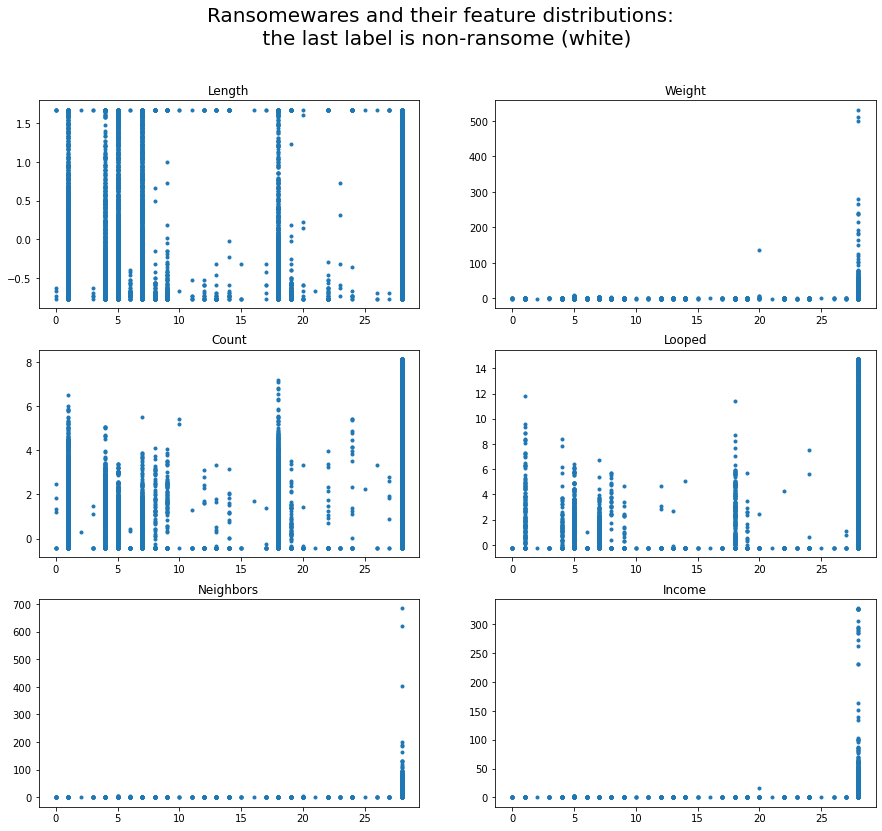

In [15]:
fig, axs = plt.subplots(3,2,figsize=(15,13))
fig.suptitle('Ransomewares and their feature distributions: \n the last label is non-ransome (white)',fontsize=20)
axs[0,0].plot(df.label, df['length'],marker='o',markersize=3,linestyle='')
axs[0,0].set_title('Length')
axs[0,1].plot(df.label, df['weight'],marker='o',markersize=3,linestyle='')
axs[0,1].set_title('Weight')
axs[1,0].plot(df.label, df['count'],marker='o',markersize=3,linestyle='')
axs[1,0].set_title('Count')
axs[1,1].plot(df.label, df['looped'],marker='o',markersize=3,linestyle='')
axs[1,1].set_title('Looped')
axs[2,0].plot(df.label, df['neighbors'],marker='o',markersize=3,linestyle='')
axs[2,0].set_title('Neighbors')
axs[2,1].plot(df.label, df['income'],marker='o',markersize=3,linestyle='')
axs[2,1].set_title('Income')

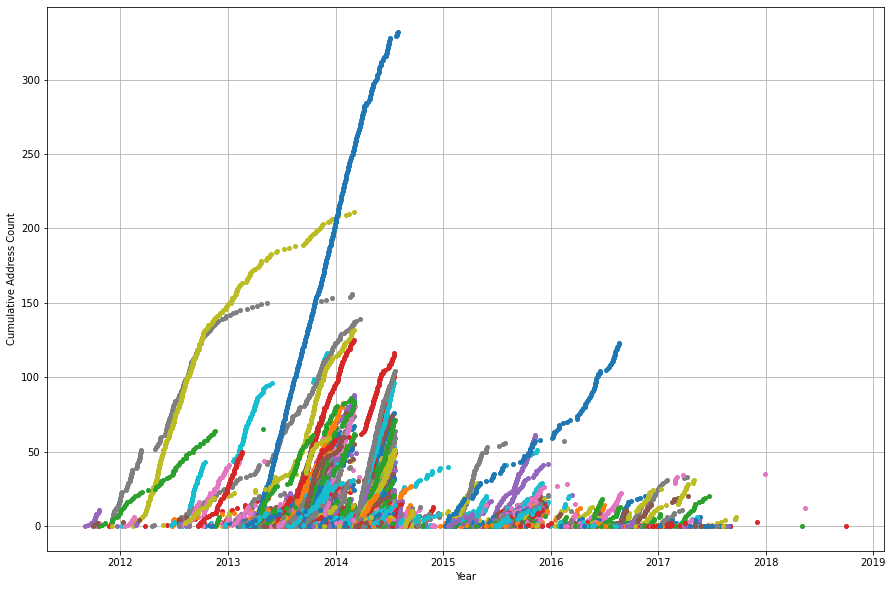

In [8]:
# how many of each non-white label do we have?
plt.figure(figsize=(15,10))
for name, group in ransom[['address','address_cumcount','date']].groupby('address'):
    plt.plot(group['date'],group['address_cumcount'],label=name,marker='o',markersize=4,linestyle='')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Cumulative Address Count')
plt.show()

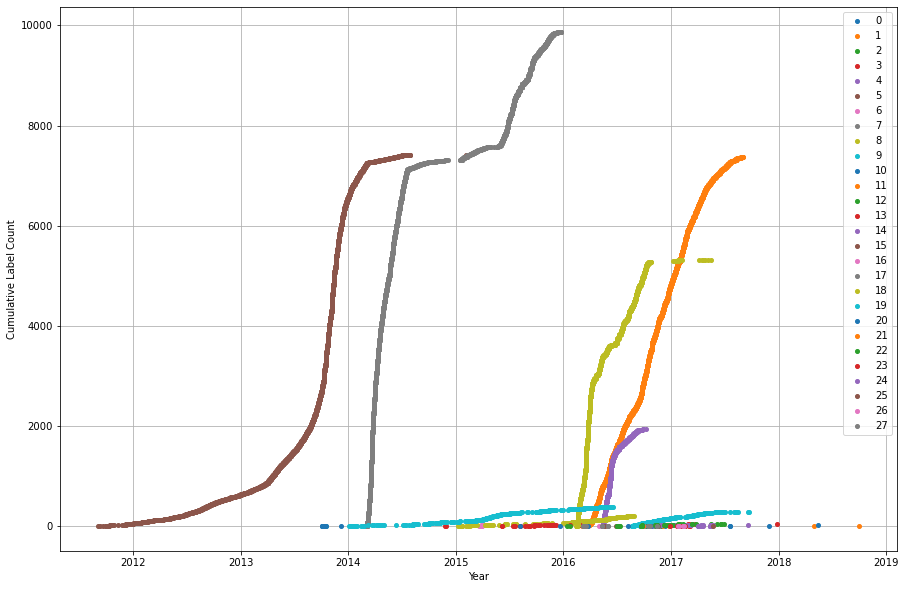

In [9]:
# how many of each random label do we have?
plt.figure(figsize=(15,10))
for name, group in ransom[['label','label_cumcount','date']].groupby('label'):
    plt.plot(group['date'],group['label_cumcount'],label=name,marker='o',markersize=4,linestyle='')
plt.legend()
plt.grid()
plt.xlabel('Year',)
plt.ylabel('Cumulative Label Count')
plt.show()

In [17]:
df.plot('count','looped')

<AxesSubplot:xlabel='count'>

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

In [10]:
# how many of each label do we have?
df.label.value_counts()[:10].append(pd.Series({'other':df.label.value_counts()[10:].sum()}))

28       2300268
7           9872
5           7422
1           7381
18          5320
4           1933
19           388
9            290
8            210
6             47
other        226
dtype: int64